In [70]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [71]:
def create_mlp(dims, activation='relu', final_activation='log_softmax'):
    assert len(dims) >= 2
    if isinstance(activation, str):
        activation = [activation] * (len(dims) - 2)
    if isinstance(activation, list):
        assert len(activation) == len(dims) - 2

    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(dims[0],)))
    for dim, active in zip(dims[1:-1], activation):
        model.add(tf.keras.layers.Dense(dim, activation=active))
    model.add(tf.keras.layers.Dense(dims[-1], activation=final_activation))

    model.summary()

    return model

In [85]:
X = np.linspace(-100, 100, 1000)
Y = X * X
X = X.reshape((-1, 1))
print(X.shape)

model = create_mlp([1, 32, 32, 1], activation=['relu', 'relu'], final_activation='linear')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1),
              loss=tf.keras.losses.MeanSquaredError())
model.fit(X, Y, epochs=200)

(1000, 1)
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 32)                64        
_________________________________________________________________
dense_112 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 5243919.5000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 1072984.1250
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 1306365.8750
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 1766270.8750
Epoch 5/200
32/32 [========

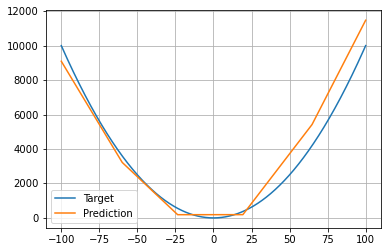

In [86]:
X_test = np.linspace(-100, 100, 1000)
Y_test = X_test * X_test

Y_pred = model(X_test.reshape((-1, 1)))
plt.plot(X_test, Y_test, label='Target')
plt.plot(X_test, Y_pred, label='Prediction')
plt.legend()
plt.grid(True)
plt.show()